In [1]:
from utils.binaries import *
from utils.plotting import *

14:49:05 (   +8.5s) [INFO   ] -- import logging
14:49:05 (  +212ms) [INFO   ] -- import numpy as np
14:49:05 (   +12ms) [INFO   ] -- import uncertainties
14:49:06 (  +552ms) [INFO   ] -- import pandas as pd
14:49:06 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
14:49:06 (    +2ms) [INFO   ] -- import binaries.tools as tools
14:49:06 (  +504ms) [INFO   ] -- import matplotlib.pyplot as plt
14:49:07 (  +776ms) [INFO   ] -- import seaborn as so
14:49:07 (    +4ms) [INFO   ] -- import plotting.tools as plot
14:49:07 (   +21ms) [DEBUG  ] -- font size set to 9.5
14:49:07 (    +1ms) [DEBUG  ] -- label size set to 13.0
14:49:07 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
14:49:07 (    +1ms) [DEBUG  ] -- markersize set to 2.0
14:49:07 (    +1ms) [DEBUG  ] -- usetex set to False


In [14]:
x, px, popt = tools.pickle_load('x_px_fx.pkl')

def exponential_corrected(x, A, mu, c, d, e, f, g):
    return A * np.exp(x * mu) + np.poly1d([c, d, e, f, g])(x)

def f_prime(x, A, mu, c, d, e, f):
    return A * mu * np.exp(x * mu) + np.poly1d([c*4, d*3, e*2, f])(x)

def f_double_prime(x, A, mu, c, d, e):
    return A * mu**2 * np.exp(x * mu) + np.poly1d([c*4*3, d*3*2, e*2*1])(x)

fx = lambda x: exponential_corrected(x, *popt)
ffx = lambda x: f_prime(x, *popt[:-1])
fffx = lambda x: f_double_prime(x, *popt[:-2])

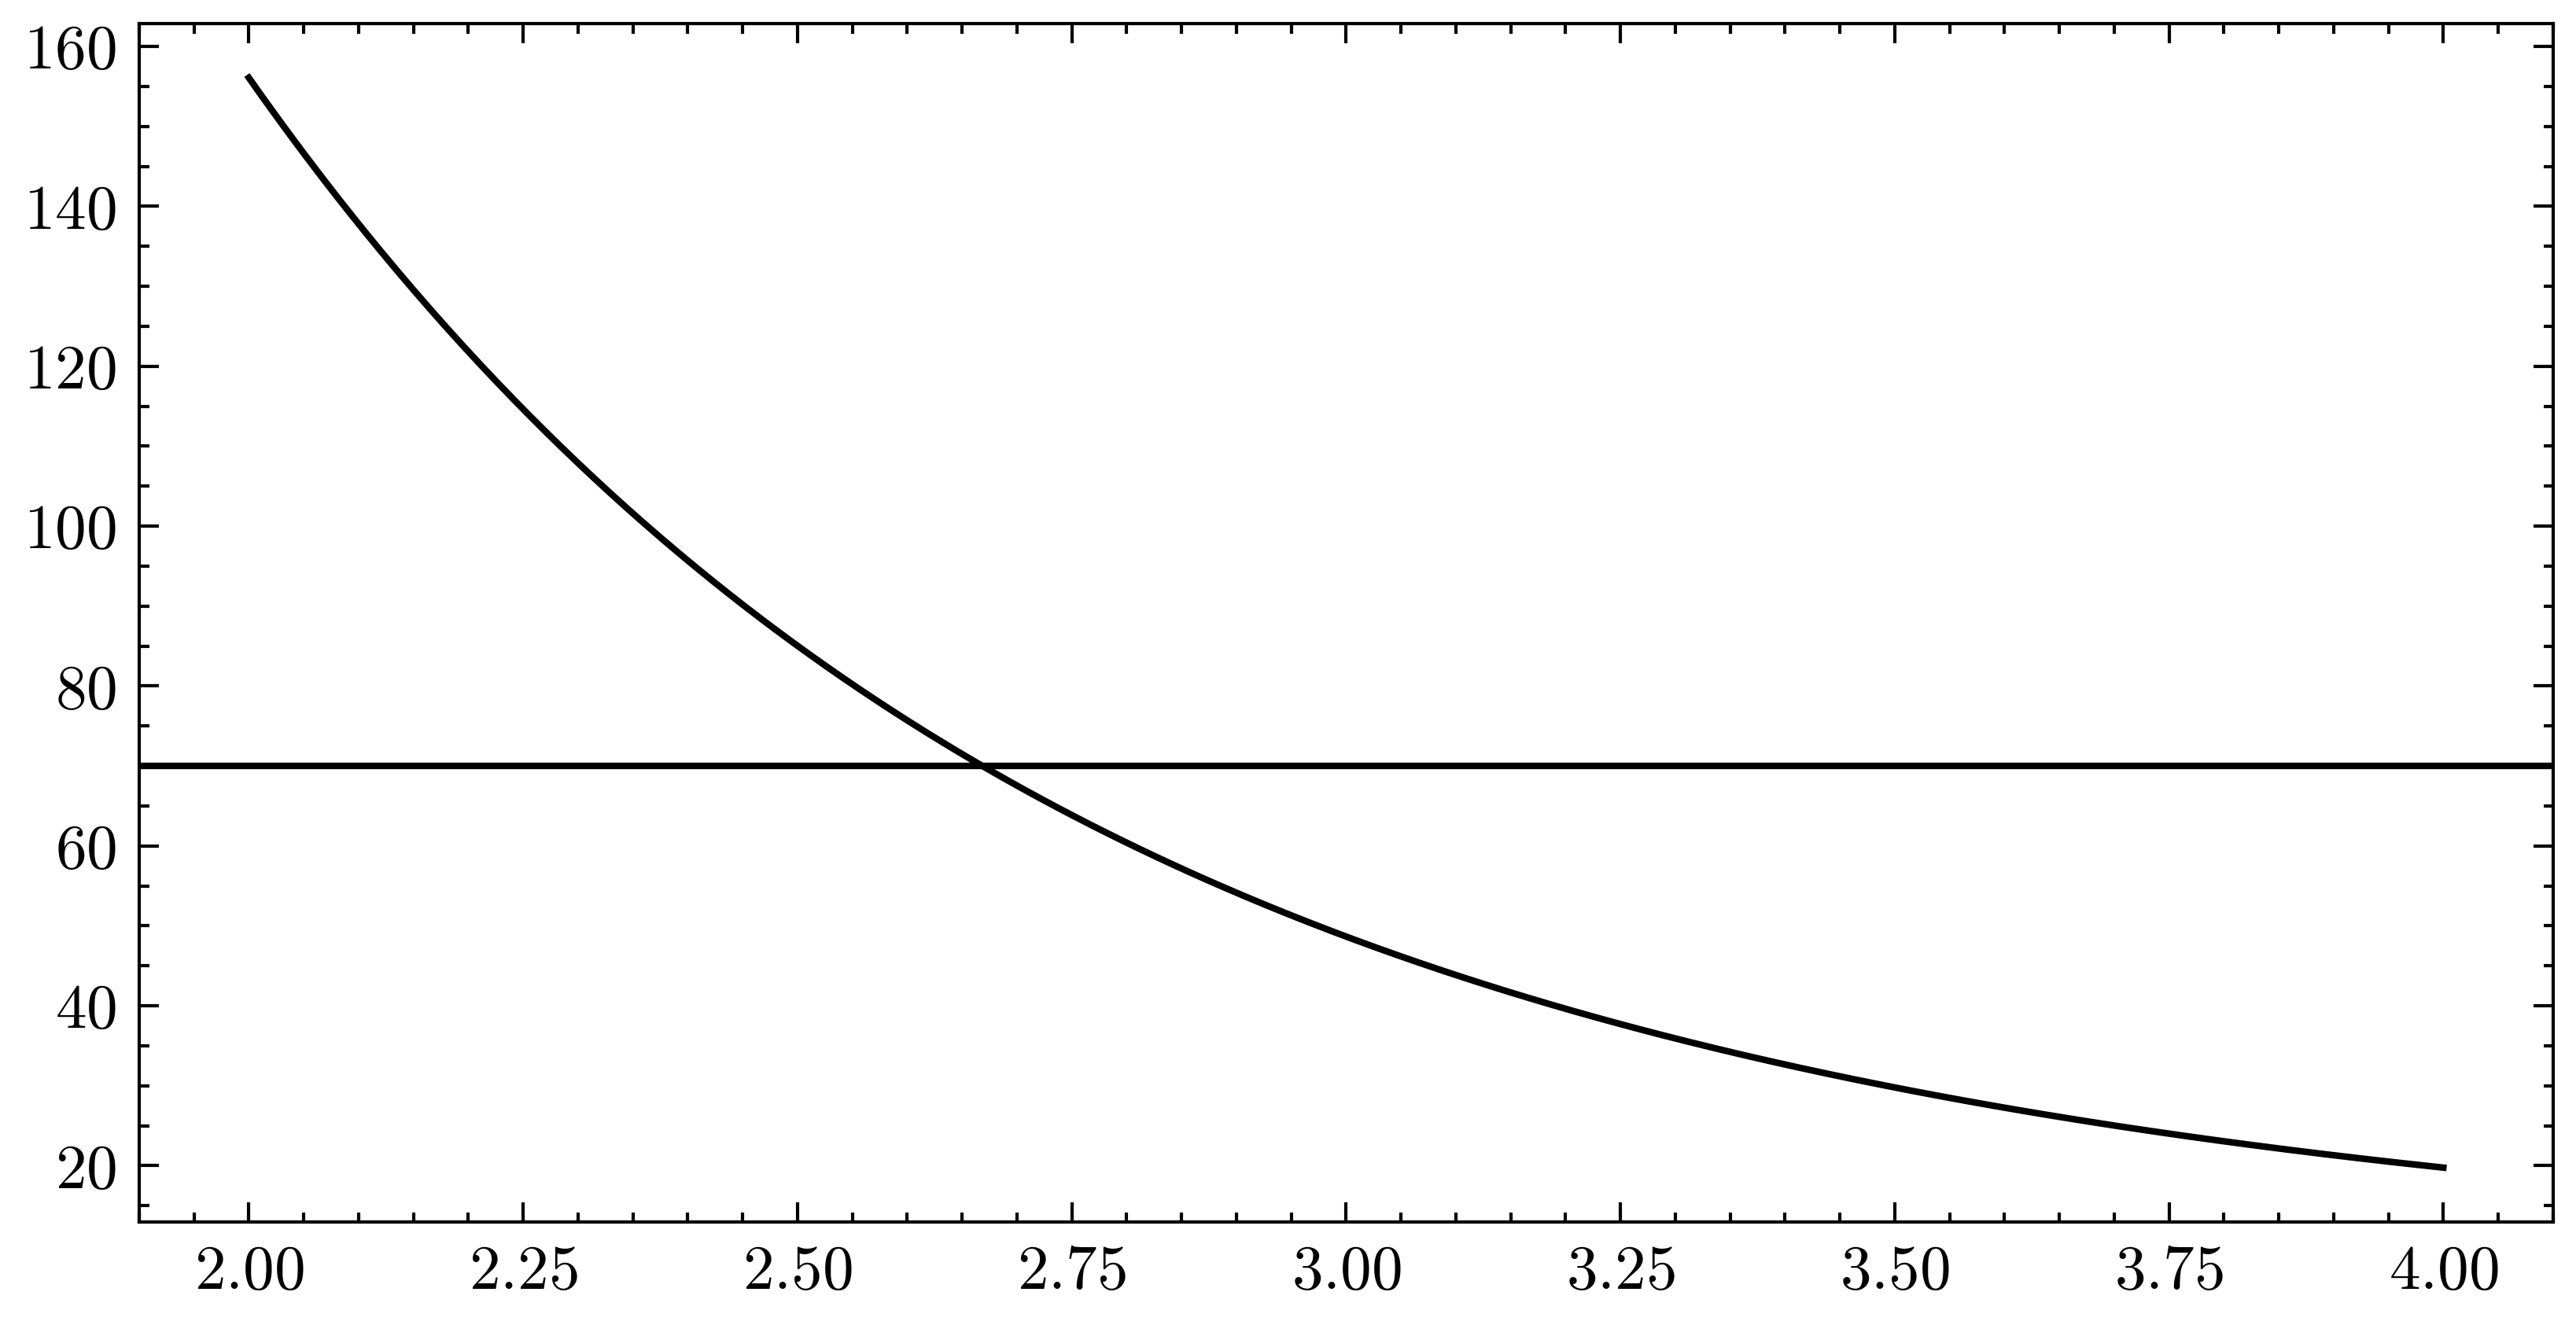

In [ ]:
bias = lambda b: fx(b) + 0.5 * fffx(b)*np.std(px)

B = np.linspace(2, 4, 400)
plt.plot(B, bias(B), marker='none')
plt.axhline(70, ls='--', label=fr"$\langle X \rangle$ = {B[np.argmin(np.abs(bias(B)-70))]:.2f}")

plt.legend()

In [10]:
2.475/2.64

0.9375